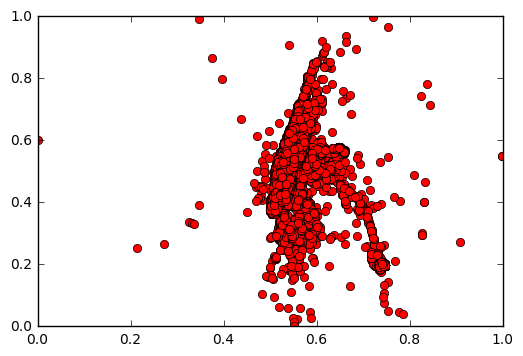

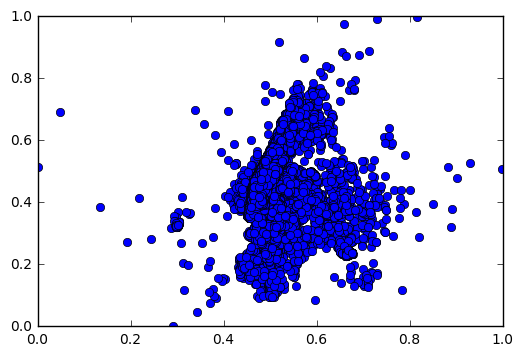

In [81]:
import csv
from numpy import *
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

start_lng = []
start_lat = []
end_lng = []
end_lat = []
start_timestamp = []
duration = []

all_lng = []
all_lat = []

with open('../data/train.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    cnt = 0
    for row in spamreader:
        if 0 == cnt:
            cnt += 1
            continue
        #if cnt < 10000:
        #    continue
        #elif cnt >= 20000:
        #    break
        if cnt > 100000:
            break
        cnt += 1
        #print(row)
        
        start_lng.append(float(row[1]))
        start_lat.append(float(row[2]))
        end_lng.append(float(row[3]))
        end_lat.append(float(row[4]))
        start_timestamp.append(int(row[5]))
        duration.append(int(row[6]))

#print(start_lng,start_lat,end_lng,end_lat,start_timestamp,duration)
"""
all_lng = start_lng[:]
all_lng.extend(end_lng)

all_lat = start_lat[:]
all_lat.extend(end_lat)

mean_lng = np.mean(all_lng)
mean_lat = np.mean(all_lat)
max_lng = max(all_lng)
max_lat = max(all_lat)
min_lng = min(all_lng)
min_lat = min(all_lat)

scale_lng = max_lng - min_lng + 0.001
scale_lat = max_lat - min_lat + 0.001

new_lng = [(c-min_lng)/scale_lng for c in all_lng]
new_lat = [(c-min_lat)/scale_lat for c in all_lat]

# print(new_lng,new_lat)
"""

mean_lng_start = mean(start_lng)
mean_lat_start = mean(start_lat)
max_lng_start = max(start_lng)
max_lat_start = max(start_lat)
min_lng_start = min(start_lng)
min_lat_start = min(start_lat)

mean_lng_end = mean(end_lng)
mean_lat_end = mean(end_lat)
max_lng_end = max(end_lng)
max_lat_end = max(end_lat)
min_lng_end = min(end_lng)
min_lat_end = min(end_lat)

scale_lng_start = max_lng_start - min_lng_start + 0.001
scale_lat_start = max_lat_start - min_lat_start + 0.001

scale_lng_end = max_lng_end - min_lng_end + 0.001
scale_lat_end = max_lat_end - min_lat_end + 0.001

new_lng_start = [(c-min_lng_start)/scale_lng_start for c in start_lng]
new_lat_start = [(c-min_lat_start)/scale_lat_start for c in start_lat]

new_lng_end = [(c-min_lng_end)/scale_lng_end for c in end_lng]
new_lat_end = [(c-min_lat_end)/scale_lat_end for c in end_lat]

plt.figure(1)
plt.plot(new_lng_start, new_lat_start, 'or', color = 'red')
plt.show()

plt.figure(2)
plt.plot(new_lng_end, new_lat_end, 'or', color = 'blue')
plt.show()

In [82]:
# euclidean distance
def euclDistance(vector1, vector2):
    return sqrt(sum(power(vector2 - vector1, 2)))

# init centroids with random samples
# return k centroids
def initCentroids(dataSet, k):
    numSamples, dim = dataSet.shape
    centroids = zeros((k, dim))
    for i in range(k):
        index = int(random.uniform(0, numSamples))
        centroids[i, :] = dataSet[index, :]
    return centroids

# 4 steps for k-means
def kmeans(dataSet, centroids, k):
    numSamples, dim = dataSet.shape

    # clusterAssment store the samples' cluster and the distance's squere
    clusterAssment = mat(zeros((numSamples, 2)))
    clusterChanged = True

    # step 1: initial centroids
    #centroids = initCentroids(dataSet, k)

    while clusterChanged:

        # clusterChanged will be True until find the min distance (minIndex remained the same)
        clusterChanged = False

        # for each sample
        for i in range(numSamples):
            # init of minDist and minIndex
            minDist = 100000.0
            minIndex = 0

            # step 2:
            # calculate the eucDistance for each centroid and find the closest one
            # save the min distance in minDist
            # save the index of the centriod in minIndex for later updating of its cluster
            for j in range(k):
                distance = euclDistance(centroids[j, :], dataSet[i, :])
                if distance < minDist:
                    minDist = distance
                    minIndex = j

            # step 3: update cluster of all centroids
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
                clusterAssment[i, :] = minIndex, minDist**2

        # step 4: update centroids
        for j in range(k):
            pointsInCluster = dataSet[nonzero(clusterAssment[:, 0] == j)[0]]
            centroids[j, :] = mean(pointsInCluster, axis = 0)

    print("Cluster is complete!")
    return centroids, clusterAssment, numSamples

In [83]:
centroids_start = [
                    [40.741462, -74.042449],
                    [40.766781, -73.978302],
                    [40.694095, -73.952756],
                                            ]
centroids_end = [
                    [40.741462, -74.042449],
                    [40.766781, -73.978302],
                    [40.694095, -73.952756],
                                            ]

for centroid in centroids_start:
    centroid[1] = (centroid[1] - min_lng_start) / scale_lng_start
    centroid[0] = (centroid[0] - min_lat_start) / scale_lat_start

for centroid in centroids_end:
    centroid[1] = (centroid[1] - min_lng_end) / scale_lng_end
    centroid[0] = (centroid[0] - min_lat_end) / scale_lat_end

centroids_start = array(centroids_start)
centroids_end = array(centroids_end)

print(centroids_start, centroids_end)
    

[[ 0.48065593  0.47410407]
 [ 0.55535624  0.54012474]
 [ 0.34090594  0.56641691]] [[ 0.43145206  0.42807758]
 [ 0.48301678  0.48768799]
 [ 0.33498434  0.51142733]]


In [84]:
start_points = dstack((new_lng_start, new_lat_start))[0]
end_points = dstack((new_lng_end, new_lat_end))[0]

In [85]:
k = 3
centroids_final_start, clusterAssment_start, numSamples_start = kmeans(start_points, centroids_start, k)
print(clusterAssment_start)
print(centroids_final_start)
print(numSamples_start)


Cluster is complete!
[[  1.00000000e+00   7.01597253e-03]
 [  2.00000000e+00   1.99578100e-03]
 [  1.00000000e+00   3.56403447e-03]
 ..., 
 [  2.00000000e+00   1.99357427e-03]
 [  1.00000000e+00   4.02624707e-03]
 [  1.00000000e+00   2.86515641e-03]]
[[ 0.72703047  0.20371005]
 [ 0.5262359   0.45771291]
 [ 0.55151281  0.56370694]]
100000


In [86]:
k = 3
centroids_final_end, clusterAssment_end, numSamples_end = kmeans(end_points, centroids_end, k)
print(clusterAssment_end)
print(centroids_final_end)
print(numSamples_end)

Cluster is complete!
[[  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]
 ..., 
 [  1.00000000e+00   8.13298127e-04]
 [  0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00]]
[[ 0.4770412   0.42432771]
 [ 0.50254125  0.50178193]
 [ 0.53776007  0.29476709]]
100000
